In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nibabel as nib

In [3]:
mri_file = 'Data/ATLAS_R2.0/ATLAS_2/MNI152NLin2009aSym.nii.gz'
img = nib.load(mri_file)

In [4]:
print(type(img))

<class 'nibabel.nifti1.Nifti1Image'>


In [5]:
img.shape

(197, 233, 189)

In [6]:
hdr = img.header
hdr

In [7]:
hdr.get_zooms()

(1.0, 1.0, 1.0)

In [8]:
hdr.get_xyzt_units()

('mm', 'sec')

In [9]:
img_data = img.get_fdata()
print(type(img_data))  # it's a numpy array!
print(img_data.shape)
data = img_data

<class 'numpy.ndarray'>
(197, 233, 189)


In [10]:
print(img_data)

[[[0.30525313 0.39281589 0.3839112  ... 0.0885724  0.06927891 0.06927891]
  [0.45069636 0.83508203 0.73861458 ... 0.13754818 0.14496876 0.07669949]
  [0.41656172 0.75642396 0.72674166 ... 0.14348464 0.14051641 0.10786589]
  ...
  [1.03098515 1.4851242  1.53261587 ... 0.57387786 0.55606849 0.29783256]
  [0.9745888  1.58901222 1.64540858 ... 0.51006094 0.50412448 0.30970547]
  [0.60504427 0.64956771 1.05324687 ... 0.31861016 0.2815073  0.21472214]]

 [[0.91819244 1.37529973 1.27289582 ... 0.15387344 0.15238933 0.09154063]
  [1.62166274 2.51064737 2.37559294 ... 0.27705495 0.27705495 0.17168282]
  [1.48809243 2.47948096 2.40824346 ... 0.29931667 0.30525313 0.21175391]
  ...
  [1.86802576 2.58188486 2.61453539 ... 1.39162499 1.31741926 0.7816539 ]
  [1.81756587 2.53290908 2.64124945 ... 1.301094   1.2907052  0.76978099]
  [1.50441769 1.62314686 1.62166274 ... 0.79352682 0.77720156 0.40320469]]

 [[1.11261145 1.64244035 1.58455988 ... 0.16574636 0.16574636 0.12715938]
  [1.89177159 3.101324

In [11]:
mid_vox = img_data[118:121, 118:121, 108:111]
print(mid_vox)

[[[81.6005964  81.40469328 81.52045421]
  [81.65996098 81.38094744 81.58575525]
  [81.7030003  80.98172063 81.27705942]]

 [[81.65105629 81.57536645 82.08293363]
  [82.22095629 81.95084744 82.58456435]
  [82.48067633 81.94639509 82.4673193 ]]

 [[81.94045863 82.04137842 83.10548856]
  [82.53410446 82.87099846 83.47948543]
  [82.44505758 83.20789247 83.70507085]]]


In [12]:
mid_slice_x = img_data[100, :, :]
print(mid_slice_x.shape)

(233, 189)


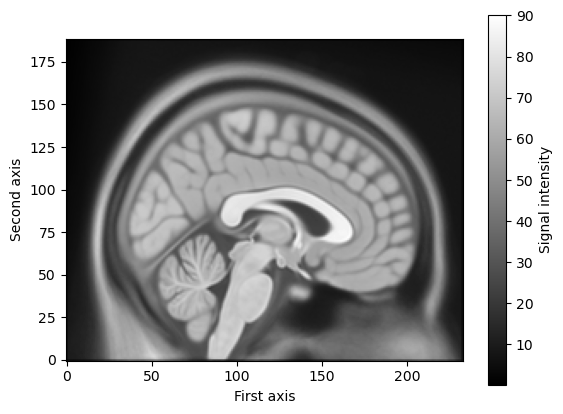

In [13]:
plt.imshow(mid_slice_x.T, cmap='gray', origin='lower')
plt.xlabel('First axis')
plt.ylabel('Second axis')
plt.colorbar(label='Signal intensity')
plt.show()

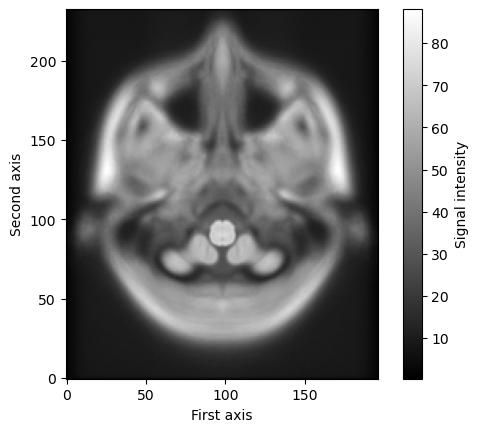

In [14]:
second_slice = img_data[:, :, 10]
plt.imshow(second_slice.T, cmap='gray', origin='lower')
plt.xlabel('First axis')
plt.ylabel('Second axis')
plt.colorbar(label='Signal intensity')
plt.show()

In [15]:
from ipywidgets import interact, IntSlider

# Function to display slice with sliders for X, Y, and Z dimensions
def display_slices(x_idx, y_idx, z_idx):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Display slice along X-axis
    axes[0].imshow(data[x_idx, :, :].T, cmap='gray', origin='lower')
    axes[0].set_xlabel('Y-axis')
    axes[0].set_ylabel('Z-axis')
    axes[0].set_title(f'X-slice: {x_idx}')
    axes[0].set_aspect('equal')

    # Display slice along Y-axis
    axes[1].imshow(data[:, y_idx, :].T, cmap='gray', origin='lower')
    axes[1].set_xlabel('X-axis')
    axes[1].set_ylabel('Z-axis')
    axes[1].set_title(f'Y-slice: {y_idx}')
    axes[1].set_aspect('equal')

    # Display slice along Z-axis
    axes[2].imshow(data[:, :, z_idx].T, cmap='gray', origin='lower')
    axes[2].set_xlabel('X-axis')
    axes[2].set_ylabel('Y-axis')
    axes[2].set_title(f'Z-slice: {z_idx}')
    axes[2].set_aspect('equal')

    plt.tight_layout()
    plt.show()

# Determine the number of slices along each dimension
num_slices_x = data.shape[0]
num_slices_y = data.shape[1]
num_slices_z = data.shape[2]

# Create sliders for X, Y, and Z dimensions
slider_x = IntSlider(min=0, max=num_slices_x-1, step=1, value=num_slices_x//2, description='X Index')
slider_y = IntSlider(min=0, max=num_slices_y-1, step=1, value=num_slices_y//2, description='Y Index')
slider_z = IntSlider(min=0, max=num_slices_z-1, step=1, value=num_slices_z//2, description='Z Index')

# Display interactive plot with sliders
interact(display_slices, x_idx=slider_x, y_idx=slider_y, z_idx=slider_z)

interactive(children=(IntSlider(value=98, description='X Index', max=196), IntSlider(value=116, description='Y…

<function __main__.display_slices(x_idx, y_idx, z_idx)>

In [16]:
# # Load NIfTI images
# nii_img1 = nib.load('image_.nii')
# nii_img2 = nib.load('image2.nii')

# # Extract data from NIfTI images
# data1 = nii_img1.get_fdata()
# data2 = nii_img2.get_fdata()

# # Create HDF5 file
# with h5py.File('multi_nifti.h5', 'w') as hf:
#     # Store NIfTI datasets
#     hf.create_dataset('image1', data=data1)
#     hf.create_dataset('image2', data=data2)

In [19]:
# def combine_nifti_to_hdf5(nifti_files, h5_file_path):
#     # Load data from each NIfTI file into NumPy arrays
#     nifti_data = [nib.load(nii_file).get_fdata() for nii_file in nifti_files]

#     # Combine data along a new axis (assuming they have the same shape)
#     combined_data = np.stack(nifti_data, axis=-1)

#     # Save combined data as a dataset in an HDF5 file
#     with h5py.File(h5_file_path, 'w') as hf:
#         hf.create_dataset('combined_data', data=combined_data)

# # Example usage
# nifti_files = ['image.nii.gz', 'mask.nii.gz']  # List of NIfTI file paths
# h5_file_path = 'combined_data.h5'  # Output HDF5 file path

# combine_nifti_to_hdf5(nifti_files, h5_file_path)

SyntaxError: invalid non-printable character U+00A0 (763285809.py, line 16)